In [1]:
import pandas as pd
import os
ruta = str(os.getcwd()).replace('\\','/')
import warnings
warnings.filterwarnings('ignore')

# Caso Práctico:
# Los sistemas actuales generan tres archivos distintos:

In [2]:
df_catalog = pd.read_csv(ruta+'/catalog.csv', names = ['sku_code','category','timestamp'] )

In [3]:
df_catalog.head()

,sku_code,category,timestamp
0,HU725HB157ZOSLAAR,"4,1 Health & Beauty",2015-09-03 09:34:02
1,HP425HP0ZZOOCLAAR,"5,2 Computing",2016-12-08 13:52:24
2,AA016BK1G5T8GLAAR,"2,1 Books",2015-10-01 02:17:08
3,HP425HP04FLU0LAAR,"5,2 Computing",2018-03-20 16:27:36
4,CO584BK26QMRLAAR,"2,1 Books",2015-05-05 10:07:01


In [24]:
df_customers = pd.read_csv(ruta+'/customers.csv', names = ['id_cliente','nombre','email', 'timestamp'] )

In [25]:
df_customers.rename(columns={'id_cliente':'id_customer'},inplace=True)

In [26]:
df_customers.head()

,id_customer,nombre,email,timestamp
0,75,jairo andres correa yepes,test@mail0.5971434131238083.com,2014-11-06 13:59:37
1,79,Martín Gabriel Maestri,test@mail0.784092169985261.com,2014-11-06 15:28:35
2,87,Darío Recalde,test@mail0.1290306412885251.com,2014-11-06 16:45:46
3,115,Romina Galeano,test@mail0.2928767272204875.com,2014-11-07 01:08:12
4,225,Pablo López,test@mail0.07729174297050735.com,2014-11-08 03:23:02


In [27]:
df_ventas = pd.read_csv(ruta+'/ventas_2019.csv', names = ['id_venta', 'id_customer', 'sku_code', 'numero_de_orden', 'precio_unitario', 'unidades', 'importe', 'timestamp'] )

In [28]:
df_ventas.head()

,id_venta,id_customer,sku_code,numero_de_orden,precio_unitario,unidades,importe,timestamp
0,74655,14600,HP425HP0ZZOOCLAAR,700062923,3006.0,5,15030.0,2019-01-01
1,74658,57470,HP425HP04FLU0LAAR,700072923,12999.0,5,64995.0,2019-01-01
2,74659,57476,HP425HP04FLU0LAAR,700052923,12999.0,5,64995.0,2019-01-01
3,74660,57475,HP425HP0OPSVCLAAR,700012923,52999.0,5,264995.0,2019-01-01
4,74664,57483,HP425HP12WPJGLAAR,700066923,1150.0,5,5750.0,2019-01-02


In [29]:
df_ventas['sku_code'].unique()

array(['HP425HP0ZZOOCLAAR', 'HP425HP04FLU0LAAR', 'HP425HP0OPSVCLAAR',
       'HP425HP12WPJGLAAR', 'HP425HP1FGUMGLAAR', 'HP425HP0U2PBCLAAR',
       'HP425HP1ETDN0LAAR', 'HP425HP18V1L8LAAR', 'HP425HP1G2A88LAAR',
       'HP425HP0O4D9KLAAR', 'HP425EL1BFVC0LAAR', 'HP425EL0VUZ7CLAAR',
       'HP425EL0CHIEOLAAR', 'HP425HP0C8DUWLAAR', 'HP425HP18R93CLAAR',
       'HP425HP0X3JIWLAAR', 'HP425EL0D2Y0GLAAR', 'HP425EL0MJQJ4LAAR',
       'HP425HP02FBZCLAAR', 'HP425HP0U1CMKLAAR', 'HP425HP0THHFCLAAR',
       'HP425EL0J1A28LAAR', 'HP425EL0OZM40LAAR', 'HP425EL069C6WLAAR',
       'HP425HP0MW1L4LAAR', 'HP425EL1NGM1CLAAR', 'HP425EL1010FSLAAR',
       'HP425EL00KUB4LAAR', 'HP425EL0GBKBCLAAR', 'HP425HP1FW0UCLAAR',
       'HP425HP1EYJO8LAAR', 'HP425HP1ED42GLAAR', 'HP425HP0UM0GCLAAR',
       'HP425HP0QW8Y0LAAR', 'HP425HP1M0MA0LAAR', 'HP425EL0G57ZWLAAR',
       'HP425HP0TCUZOLAAR', 'HP425HP0EC02WLAAR', 'HP425EL0MFVN4LAAR',
       'HP425EL1HY5QWLAAR', 'HP425EL00YKWOLAAR', 'HP425HP1BATE0LAAR',
       'HP425EL0M9WD

# 1. Generar una sábana que nos permita denormalizar la información para futuros análisis.

In [34]:
#Join1
df_sabana=df_ventas.merge(df_customers,on='id_customer',how='left')

df_sabana.rename(columns={'timestamp_x':'timestamp_ventas','timestamp_y':'timestamp_customer'},inplace=True)

#Join2
df_sabana=df_sabana.merge(df_catalog,on='sku_code',how='left')
df_sabana.rename(columns={'timestamp':'timestamp_catalog'},inplace=True)


df_sabana.drop_duplicates(inplace=True)
df_sabana.shape[0]

10000

In [35]:
df_sabana.head()

,id_venta,id_customer,sku_code,numero_de_orden,precio_unitario,unidades,importe,timestamp_ventas,nombre,email,timestamp_customer,category,timestamp_catalog
0,74655,14600,HP425HP0ZZOOCLAAR,700062923,3006.0,5,15030.0,2019-01-01,Augusto Obeide,test@mail0.06461611768660705.com,2015-05-15 15:50:02,"5,2 Computing",2016-12-08 13:52:24
233,74658,57470,HP425HP04FLU0LAAR,700072923,12999.0,5,64995.0,2019-01-01,Cecilia Bottacchi,test@mail0.37895011378354404.com,2015-12-11 00:27:09,"5,2 Computing",2018-03-20 16:27:36
262,74659,57476,HP425HP04FLU0LAAR,700052923,12999.0,5,64995.0,2019-01-01,rocio cadiz,test@mail0.7066011696184065.com,2015-12-11 01:36:00,"5,2 Computing",2018-03-20 16:27:36
291,74660,57475,HP425HP0OPSVCLAAR,700012923,52999.0,5,264995.0,2019-01-01,denis galfrascoli,test@mail0.6792525739215804.com,2015-12-11 01:10:37,"5,2 Computing",2017-11-10 18:07:45
318,74664,57483,HP425HP12WPJGLAAR,700066923,1150.0,5,5750.0,2019-01-02,Pablo Kaufmann,test@mail0.29644209546636985.com,2015-12-11 08:18:04,"5,2 Computing",2016-12-07 12:21:35


In [36]:
df_sabana['sku_code'].unique()

array(['HP425HP0ZZOOCLAAR', 'HP425HP04FLU0LAAR', 'HP425HP0OPSVCLAAR',
       'HP425HP12WPJGLAAR', 'HP425HP1FGUMGLAAR', 'HP425HP0U2PBCLAAR',
       'HP425HP1ETDN0LAAR', 'HP425HP18V1L8LAAR', 'HP425HP1G2A88LAAR',
       'HP425HP0O4D9KLAAR', 'HP425EL1BFVC0LAAR', 'HP425EL0VUZ7CLAAR',
       'HP425EL0CHIEOLAAR', 'HP425HP0C8DUWLAAR', 'HP425HP18R93CLAAR',
       'HP425HP0X3JIWLAAR', 'HP425EL0D2Y0GLAAR', 'HP425EL0MJQJ4LAAR',
       'HP425HP02FBZCLAAR', 'HP425HP0U1CMKLAAR', 'HP425HP0THHFCLAAR',
       'HP425EL0J1A28LAAR', 'HP425EL0OZM40LAAR', 'HP425EL069C6WLAAR',
       'HP425HP0MW1L4LAAR', 'HP425EL1NGM1CLAAR', 'HP425EL1010FSLAAR',
       'HP425EL00KUB4LAAR', 'HP425EL0GBKBCLAAR', 'HP425HP1FW0UCLAAR',
       'HP425HP1EYJO8LAAR', 'HP425HP1ED42GLAAR', 'HP425HP0UM0GCLAAR',
       'HP425HP0QW8Y0LAAR', 'HP425HP1M0MA0LAAR', 'HP425EL0G57ZWLAAR',
       'HP425HP0TCUZOLAAR', 'HP425HP0EC02WLAAR', 'HP425EL0MFVN4LAAR',
       'HP425EL1HY5QWLAAR', 'HP425EL00YKWOLAAR', 'HP425HP1BATE0LAAR',
       'HP425EL0M9WD

# 2. Guardar dicha sábana en un archivo de texto.

In [37]:
df_sabana.to_csv('Sabana.csv',index=False)

In [38]:
pd.read_csv('Sabana.csv').head()

,id_venta,id_customer,sku_code,numero_de_orden,precio_unitario,unidades,importe,timestamp_ventas,nombre,email,timestamp_customer,category,timestamp_catalog
0,74655,14600,HP425HP0ZZOOCLAAR,700062923,3006.0,5,15030.0,2019-01-01,Augusto Obeide,test@mail0.06461611768660705.com,2015-05-15 15:50:02,"5,2 Computing",2016-12-08 13:52:24
1,74658,57470,HP425HP04FLU0LAAR,700072923,12999.0,5,64995.0,2019-01-01,Cecilia Bottacchi,test@mail0.37895011378354404.com,2015-12-11 00:27:09,"5,2 Computing",2018-03-20 16:27:36
2,74659,57476,HP425HP04FLU0LAAR,700052923,12999.0,5,64995.0,2019-01-01,rocio cadiz,test@mail0.7066011696184065.com,2015-12-11 01:36:00,"5,2 Computing",2018-03-20 16:27:36
3,74660,57475,HP425HP0OPSVCLAAR,700012923,52999.0,5,264995.0,2019-01-01,denis galfrascoli,test@mail0.6792525739215804.com,2015-12-11 01:10:37,"5,2 Computing",2017-11-10 18:07:45
4,74664,57483,HP425HP12WPJGLAAR,700066923,1150.0,5,5750.0,2019-01-02,Pablo Kaufmann,test@mail0.29644209546636985.com,2015-12-11 08:18:04,"5,2 Computing",2016-12-07 12:21:35


# 4. Hacer una segmentación de clientes por categoría indicando qué categoría será más probable que compre cada uno de los clientes y generar un archivo de texto con la siguiente estructura:
# id_customer Int
# category String

In [39]:
df = df_sabana[['id_customer','unidades','precio_unitario','importe','category']]
df.reset_index(drop=True,inplace=True)
df.head()
df['category'].unique()

array(['5,2 Computing'], dtype=object)

In [40]:
# Nota.- El codigo siguiente funcionaría con más categorías (analisis post cluster), pero se ha notado que solo
#se tiene información en ventas de Computing, en especifico para el whl HP

In [41]:
tad = df[['unidades','precio_unitario','importe']]
tad.head()

,unidades,precio_unitario,importe
0,5,3006.0,15030.0
1,5,12999.0,64995.0
2,5,12999.0,64995.0
3,5,52999.0,264995.0
4,5,1150.0,5750.0


In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [43]:
l_in =[]
for k in range(2,10):
    cl = KMeans(n_clusters=k,max_iter=len(tad)*2)
    cl.fit(tad)
    l_in.append(cl.inertia_)

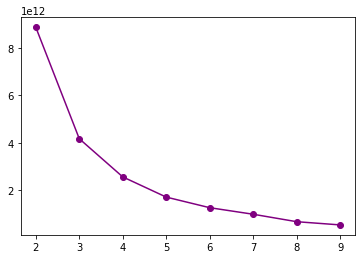

In [44]:
plt.plot(range(2,10),l_in,marker='o',color='purple')

In [45]:
kme = KMeans(n_clusters=4,max_iter=len(tad)*2)
kme.fit(tad)
df['cluster']=kme.fit_predict(tad)

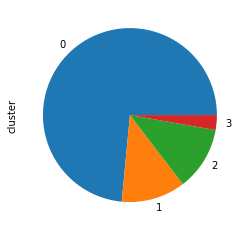

In [46]:
df.cluster.value_counts(True).plot(kind='pie')

In [47]:
df[['id_customer','cluster']].head()

,id_customer,cluster
0,14600,0
1,57470,2
2,57476,2
3,57475,3
4,57483,0


In [48]:
df[['category','cluster']].drop_duplicates()

,category,cluster
0,"5,2 Computing",0
1,"5,2 Computing",2
3,"5,2 Computing",3
6,"5,2 Computing",1


# Exportación de datos modelo

In [50]:
df.rename(columns={'cluster':'cluster_prediccion'},inplace=True)

In [51]:
df[['id_customer','category','cluster_prediccion']].to_csv('Resultado_Prediccion.csv',index=False)